# Introduction to Monte Carlo Simulation

In [1]:
import numpy as np

In [4]:
def roll_dice():
    return np.sum(np.random.randint(1,7,2))

In [8]:
roll_dice()

7

In [11]:
def monte_carlo_sim(runs=1000):
    results = np.zeros(2)
    for _ in range(runs):
        if roll_dice() == 7:
            results[0] += 1
        else:
            results[1] += 1
    return results

In [12]:
monte_carlo_sim()

array([159., 841.])

In [13]:
results = np.zeros(1000)
for i in range(1000):
    results[i] = monte_carlo_sim()[0]

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


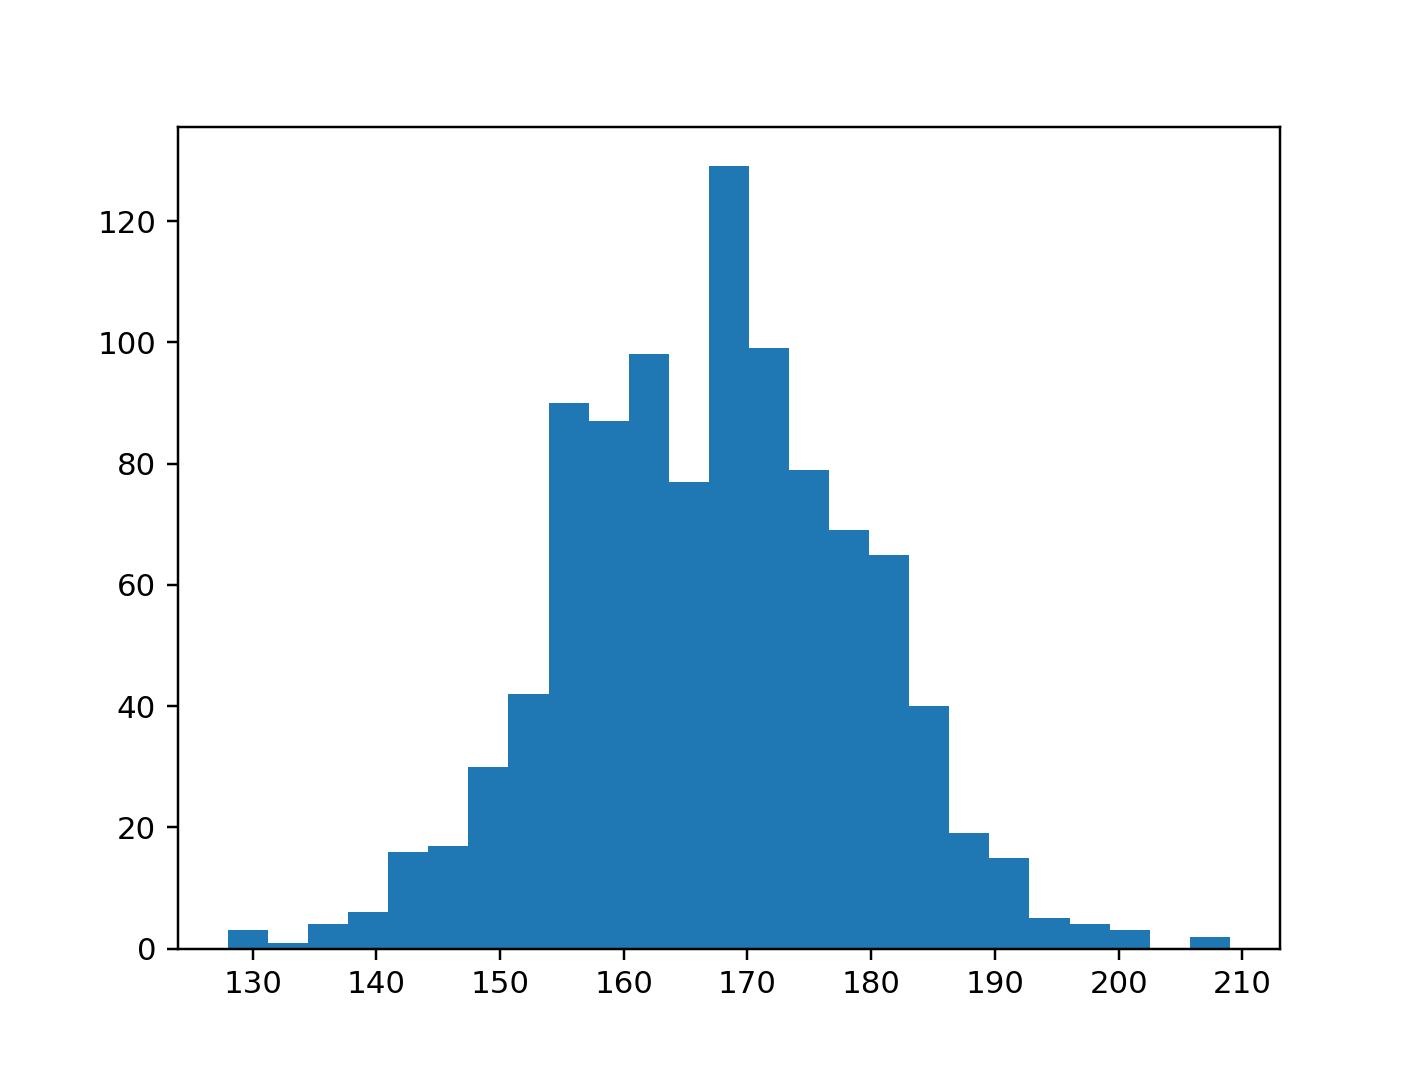

(array([  3.,   1.,   4.,   6.,  16.,  17.,  30.,  42.,  90.,  87.,  98.,
         77., 129.,  99.,  79.,  69.,  65.,  40.,  19.,  15.,   5.,   4.,
          3.,   0.,   2.]),
 array([128.  , 131.24, 134.48, 137.72, 140.96, 144.2 , 147.44, 150.68,
        153.92, 157.16, 160.4 , 163.64, 166.88, 170.12, 173.36, 176.6 ,
        179.84, 183.08, 186.32, 189.56, 192.8 , 196.04, 199.28, 202.52,
        205.76, 209.  ]),
 <BarContainer object of 25 artists>)

In [16]:
fig, ax = plt.subplots()
ax.hist(results, bins=25)

In [18]:
results.mean()

167.202

In [21]:
d1 = np.arange(1,7)
d2 = np.arange(1,7)

In [22]:
matrix = np.add.outer(d1,d2)

In [23]:
matrix

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12]])

In [26]:
matrix[matrix == 7].size

6

In [27]:
matrix[matrix  == 7].size/matrix.size

0.16666666666666666

## Monte Carlo Simulation with Portfolio and Sharpe Ratio

In [28]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [30]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers, start)

In [31]:
data = data['Adj Close']

In [32]:
log_returns = np.log(data/data.shift())

In [33]:
log_returns

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.012530,-0.024445,-0.008007
2020-01-06,0.007937,0.002581,0.003800,-0.001788
2020-01-07,-0.004714,-0.009159,0.028048,0.000671
2020-01-08,0.015958,0.015803,0.015551,0.008312
...,...,...,...,...
2022-09-02,-0.013705,-0.016807,0.000259,-0.014527
2022-09-06,-0.008249,-0.011035,0.000518,-0.008408
2022-09-07,0.009211,0.018931,0.063891,0.007782


In [35]:
weight = np.random.random(4)    #random portfolo
weight /= weight.sum()
weight

array([0.30873056, 0.17011116, 0.31495858, 0.20619969])

In [38]:
exp_rtn = np.sum(log_returns.mean()*weight)*252

In [41]:
exp_vol = np.sqrt( np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
sharpe_ratio = exp_rtn / exp_vol
sharpe_ratio

0.4999031264030368

In [45]:
# Monte Carlo Sm
n = 5000

weights = np.zeros((n, 4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [46]:
sharpe_ratios.max()

0.744084878384015

In [47]:
sharpe_ratios.argmax()

2357

In [48]:
weights[2357]

array([0.71570292, 0.26289404, 0.00576669, 0.01563635])

In [49]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


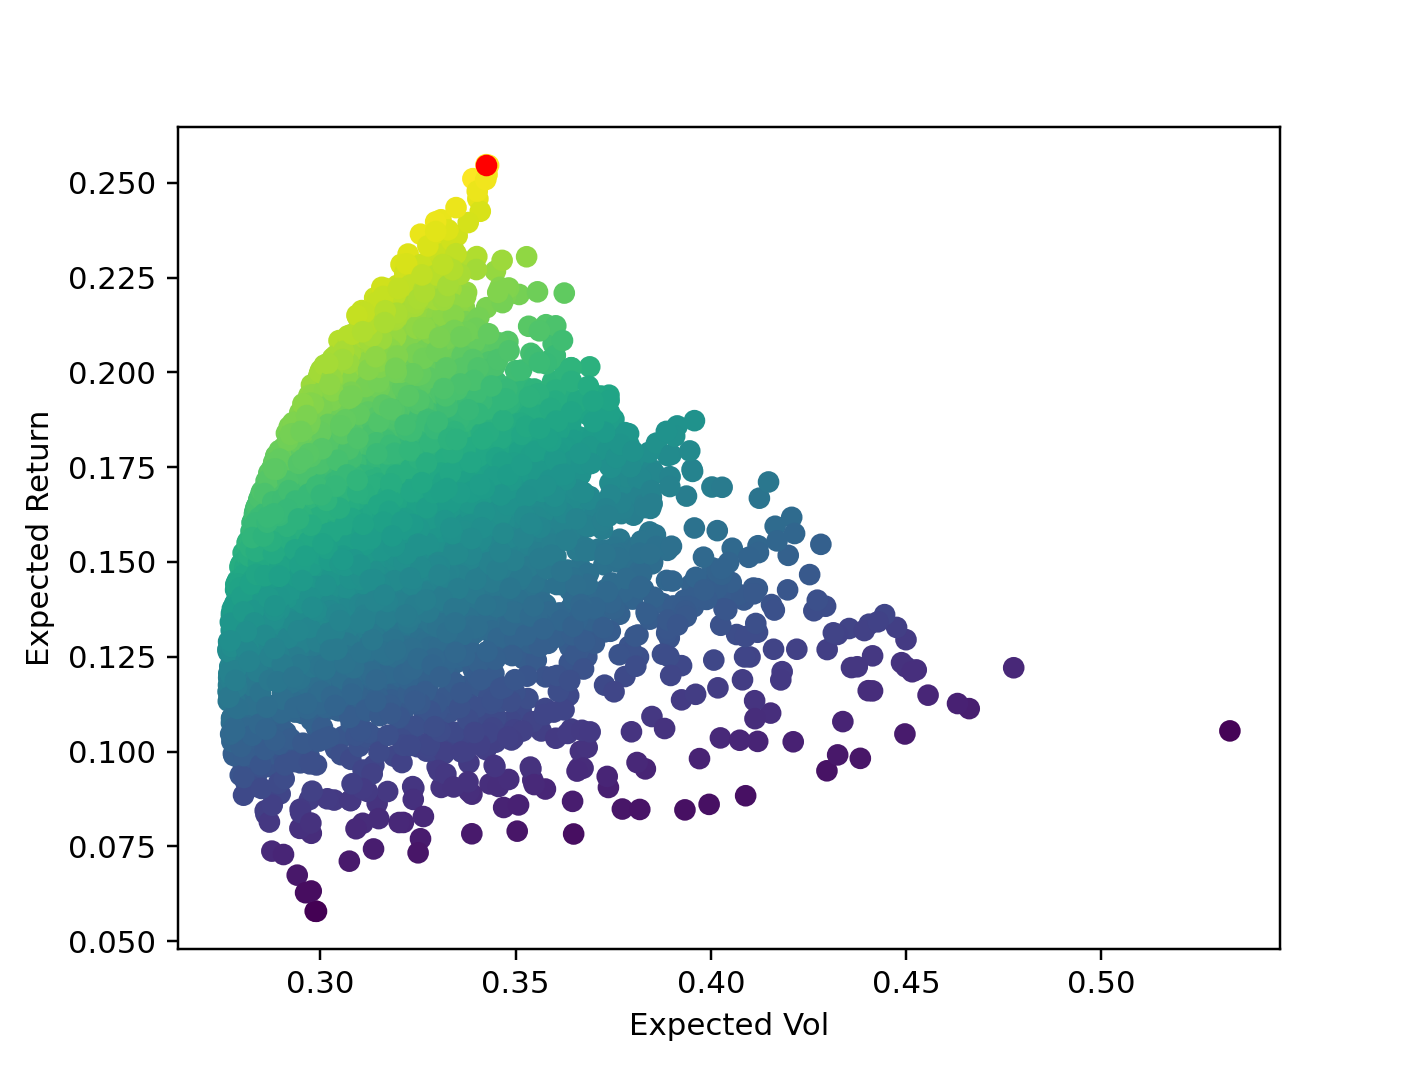

Text(0, 0.5, 'Expected Return')

In [53]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Vol')
ax.set_ylabel('Expected Return')
